**Ladino Álvarez Ricardo Arturo.**

2020-16-06

## Parts of the notebook

* Dataset Yale - Unpadded
* Eigenfaces (PCA)
    * Proyecciones(P); 
    * Componentes(C); 
    * Media(M); 
    * Pseudocovarianza (Y)
* FisherFaces
    * SB'
    * Sw'
    * W = (SB')^-1 (Sw')
    * W_ifd 
    * W_opt

In [ ]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def img_series(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [ ]:
def Ui(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    X_o = X - mean
    U, eigval, eigvec = np.linalg.svd(X_o)
    cmpt= eigvec[:n_pc] 
    prj = U[:,:n_pc]*eigval[:n_pc] 
    return prj, cmpt, mean, X_o

(165, 116, 98)

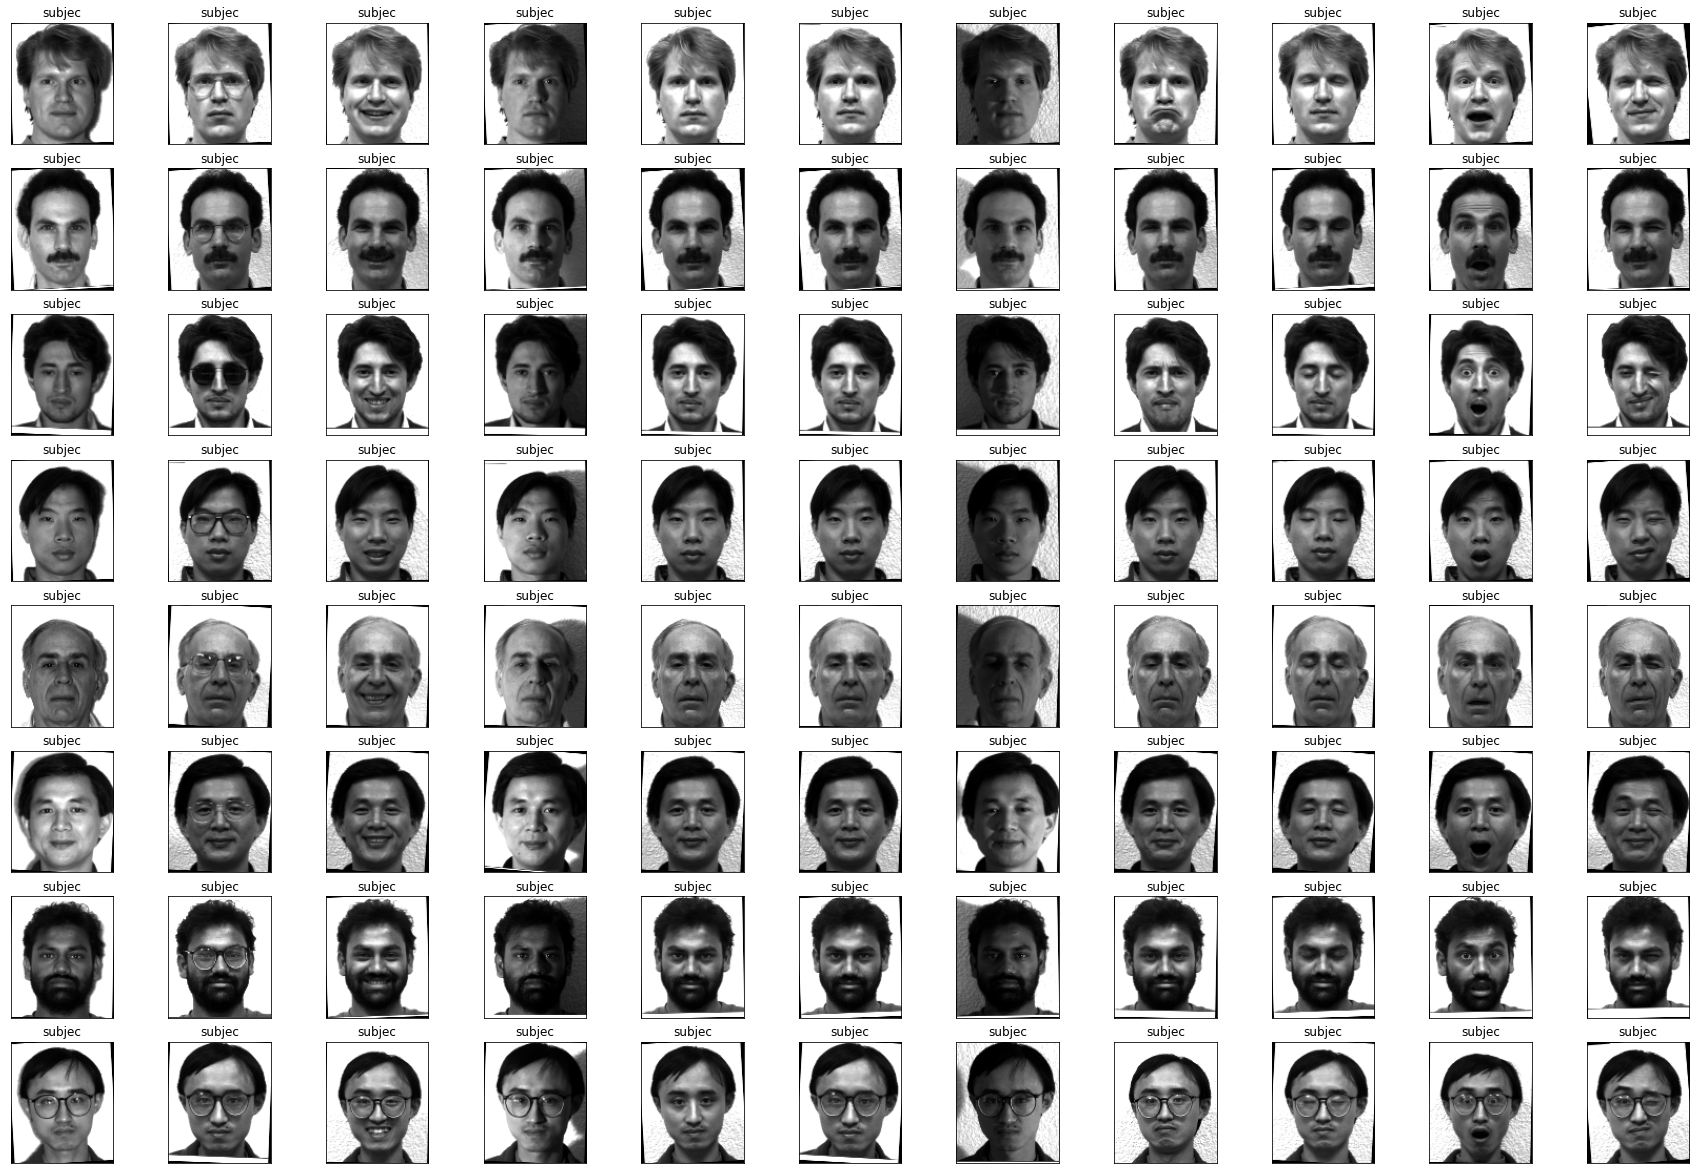

In [ ]:
col_dir = 'faces' 
faces=os.listdir(col_dir)[0:165]
face_img=[col_dir+'/' + photo for photo in faces]
Cube_Face=np.array([plt.imread(image) for image in face_img], dtype=np.float64)
face_name=[name[:name.find('0')-1].replace("_", " ") for name in faces]
n_samples, h, w = Cube_Face.shape
img_series(Cube_Face, face_name, h, w, n_row=8, n_col=11)
Cube_Face.shape

In [ ]:
## Reacomod de las imagenes a la matriz de uso
Face_lam= np.reshape(Cube_Face, (165,11368)) ### Imagen (fila) , Pixel value (columna)
Face_lam.shape

(165, 11368)

#### Eigenfaces (PCA) 
                      ಠ_ಠ

(11358, 11368)

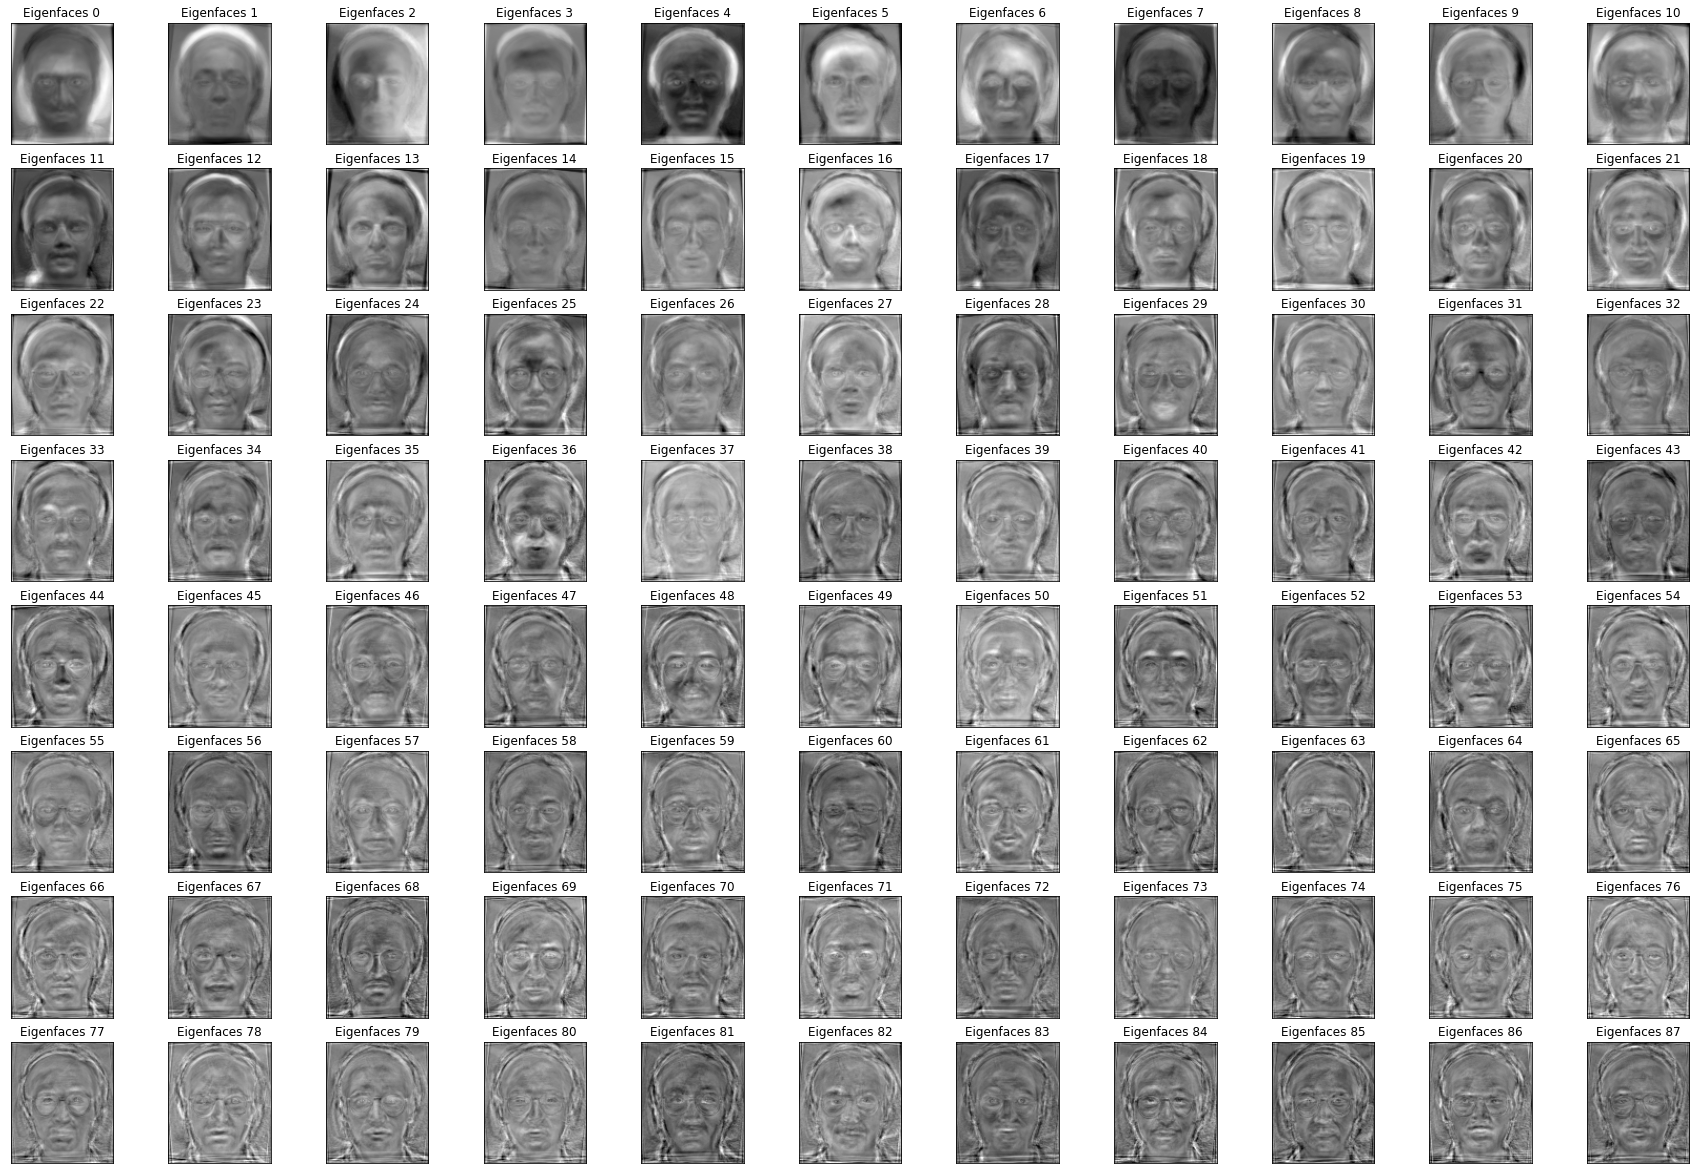

In [ ]:
## num_compo determina cuántas caras propias se quieren crear 
## Esos son los componentes principales de los cuales se recueran los datos que son el rostro humano
num_compo = (len(Face_lam[0])-10)
ladi = Cube_Face.shape
hg = ladi[1]
wg = ladi[2]
P, C, M, Y= Ui(Face_lam, num_compo) 
W_pca = C.reshape((num_compo, hg, wg)) 
W_pca_tlt = ["Eigenfaces %d" % i for i in range(W_pca.shape[0])]
img_series(W_pca, W_pca_tlt, hg, wg, n_row=8, n_col=11)
C.shape

#### FisherFaces (PCA) 
                       ಠ╭╮ಠ            

In [ ]:
C_n = C.copy() ## componente (C) = W_pca
Y_n = Y.copy() ## X-Xmean = Media sobre cada elemento
Fmean = np.mean(Face_lam) ## Media total 
FUi_U = (Y_n - Fmean) ### Media cada elemento - Media total
FUi_U.shape ### Matriz (Ui - U)

(165, 11368)

In [ ]:
### Calculando SB' como (W_pca)((Ui - U)^T(Ui - U))(W_pca)^T... 
### Esto por el arreglo que tiene mi matriz de imagenes --> (165, 11368)

mi = C_n.dot(FUi_U.transpose()) ### (W_pca)((Ui - U)^T
mii = mi.dot(FUi_U) ### (W_pca)((Ui - U)^T(Ui - U))
SB = mii.dot(C_n.transpose()) ### (W_pca)((Ui - U)^T(Ui - U))(W_pca)^T = SB'
SB.shape ### tiene la forma (m x m) 
## donde m corresponde al numero de proyecciones usadas, que recordando N - c (con C = 10) --> (11358, 11358)

(11358, 11358)

In [ ]:
### Calculando Sw' como (W_pca)((Xi - Ui)^T(Xi - Ui))(W_pca)^T... 
### Recordando que la Matriz de covarianza es ((Xi - Ui)^T(Xi - Ui))
### Esto por el arreglo que tiene mi matriz de imagenes --> (165, 11368)

la = C_n.dot(Y_n.transpose()) ## (W_pca)((Xi - Ui)^T
la2 = la.dot(Y_n) ## (W_pca)((Xi - Ui)^T(Xi - Ui))
Sw= la2.dot(C_n.transpose()) ## (W_pca)((Xi - Ui)^T(Xi - Ui))(W_pca)^T = Sw'
Sw.shape ### tiene la forma (m x m) 
## donde m corresponde al numero de proyecciones usadas, que recordando N - c (con C = 10) --> (11358, 11358)


(11358, 11358)

In [ ]:
### Calculo de la matriz W = (SB')^-1 (Sw') ... 
### Nuevamente esta forma por la manera en como se estructura la matriz de entrada
SB_in = np.linalg.inv(SB) ## (SB')^-1 
W = SB_in.dot(Sw)  ## (SB')^-1 (Sw') = w
W.shape ### tiene la forma (m x m) ... a esta se le calculan los eigvl y eignv (nota libreta )

(11358, 11358)

In [ ]:
### Eigenvectores y eigenvalores para la matriz W = (SB')^-1 (Sw')
W_u, W_eigval, W_eigvec = np.linalg.svd(W)

In [ ]:
### Eigenvectores y eigenvalores para la matriz W = (SB')^-1 (Sw')
### Para la matriz W_ifd
num_compo = (len(Face_lam[0])- 10)
C_i = np.int64((len(Face_lam[0:])/11)-1) ### C_i = Clases - 1 ... tengo 15 clases .. final 14
cmp_t= W_eigvec[:C_i] ### Genero la matriz W_ifd con (C_i - 1, N- C)^T  (14, 11358) (recordando matriz base)
prj_t =W_u[:,:num_compo]*W_eigval[:num_compo]  ### Proyecciones de la matriz W_ifd
cmp_t.shape

(14, 11358)

In [ ]:
C.shape

(11358, 11368)

#### W_opt
           ⚆ _ ⚆

In [ ]:
##### Calculando W_opt
W_opt = cmp_t.dot(C)
W_opt.shape

(14, 11368)

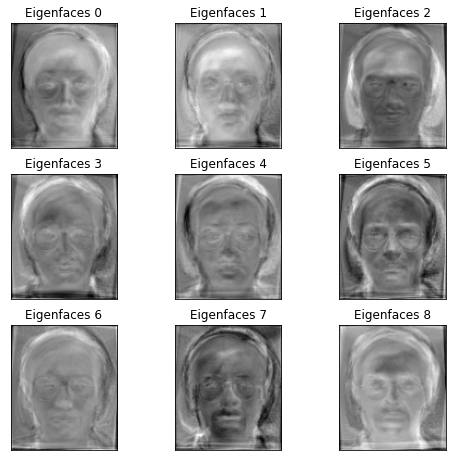

In [ ]:
W_pt = W_opt.reshape((C_i, hg, wg)) ### Reconstrucción de caras con W_opt
W_pt_tlt = ["Eigenfaces %d" % i for i in range(W_pt.shape[0])]
img_series(W_pt, W_pt_tlt, hg, wg, n_row=3, n_col=3)

In [ ]:
C.shape

(11358, 11368)